# Example for spin chain and cqed model

In [1]:
%matplotlib inline
from qutip import *
from qutip.qip.models.spinchain import *
from qutip.qip.models.circuitprocessor import *
from qutip.qip.models.cqed import *

In [2]:
N = 3
qc = QubitCircuit(N)
qc.add_gate("CNOT", targets=[0], controls=[2])

## Spinchain model

This module takes a quantum circuit and find a pulse sequence generating the circuit with the Hamiltonian realsized by the spinchain model. 

It first resolves the gate into the following gates : "GLOBALPHASE", "ISWAP", "RX", "RZ" and then genearte a time-dependent hamitonian sequence consisting of $\sigma_{x}$, $\sigma_{z}$ and $\sigma_{x}\sigma_{x}+\sigma_{y}\sigma_{y}$

In [3]:
lsc = LinearSpinChain(N, correct_global_phase=True)

# create pulse sequences
U_list = lsc.run(qc)

In [4]:
# resolved gates from "ISWAP", "RX", "RZ" 
lsc.qc2.gates

[Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[1], controls=None),
 Gate(ISWAP, targets=[1, 0], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[2, 1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RX, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(ISWAP, targets=[2, 1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RX, targets=[1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[1], controls

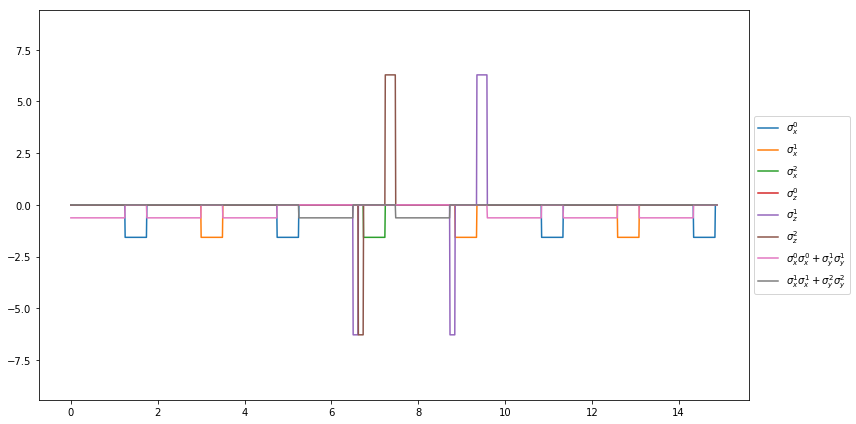

In [5]:
lsc.plot_pulses();

## CQED model

The state is represented by a resonator mode of $N_{res}$ levels and qubits states of $N$ levels. The availabel Hamitonian is $\sigma_x$, $\sigma_z$ and the qubit-cavity interaction $a^\dagger \sigma^- + a \sigma^+$.

In [6]:
qc = QubitCircuit(N)
qc.add_gate("CNOT", targets=[0], controls=[2])
# qc.add_gate("SWAP", targets=[0,2])
cqed = DispersivecQED(3)
U_list = cqed.run(qc)

Resolved gate sequence from "ISWAP", "RX", "RZ". It is a bit different compared to linear spin chain because of boundary conditions


In [7]:
cqed.qc2.gates

[Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[2, 0], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RX, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(ISWAP, targets=[2, 0], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[0], controls=None)]

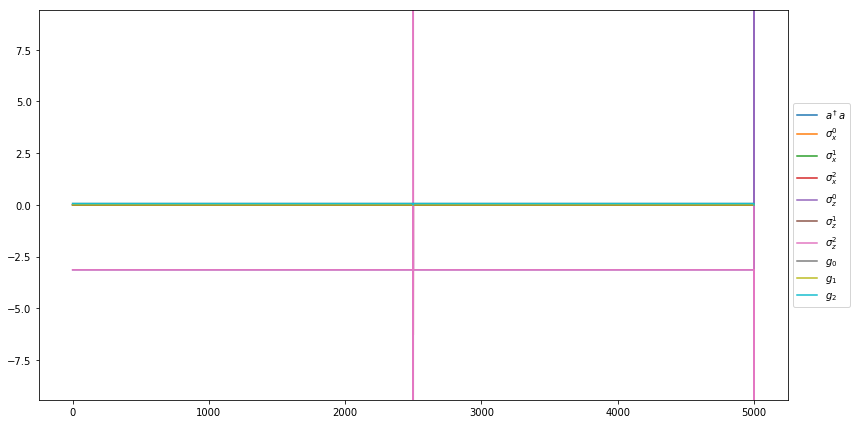

In [8]:
cqed.plot_pulses();